In [1]:
import sys
sys.executable

'C:\\Users\\hunte\\Anaconda3\\python.exe'

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
w = np.random.randn(2) # создаём одномерный массив с рандомными числами в диапозоне [0,1)
w

array([0.33285145, 0.92120727])

In [5]:
def exact_func(x):
    return w[0] + w[1] * x

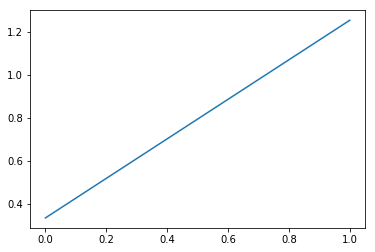

In [7]:
x_grid = np.linspace(0, 1, num = 50) # создаем одномерный массив в котором 50 чисел от [0 до 1] на одинаковом расстоянии друг от друга
y_grid = exact_func(x_grid)
plt.plot(x_grid, y_grid)
plt.show()

In [8]:
type(x_grid)

numpy.ndarray

In [13]:
Nsize = 30
x_train = np.random.rand(Nsize)
y_train_exact = exact_func(x_train)

In [14]:
def randomly_change(y):
    return y + np.random.randn(y.shape[0]) *  0.1

In [15]:
y_train = randomly_change(y_train_exact)

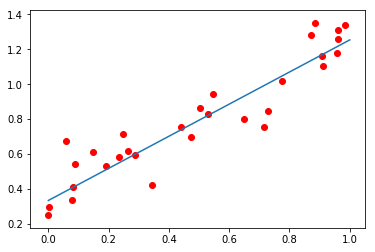

In [16]:
x_grid = np.linspace(0, 1, num = 50)
y_grid = exact_func(x_grid)
plt.plot(x_grid, y_grid)
plt.scatter(x_train, y_train, c = "r")
plt.show()

In [17]:
a = np.random.randn(3, 3)
a

array([[-0.54250937, -2.55168347,  0.80519747],
       [ 1.5120179 , -0.35571971, -2.03766009],
       [ 0.4687951 ,  0.32445281, -1.19948946]])

In [21]:
a_inv = np.linalg.inv(a)
a_inv

array([[-0.48320442,  1.24352594, -2.43683521],
       [-0.38130384, -0.121383  , -0.04976083],
       [-0.29199003,  0.45317265, -1.79953348]])

In [20]:
a_inv @ a

array([[ 1.00000000e+00,  0.00000000e+00,  4.44089210e-16],
       [-3.46944695e-18,  1.00000000e+00,  1.38777878e-17],
       [-1.11022302e-16,  0.00000000e+00,  1.00000000e+00]])

In [22]:
x_train.shape

(30,)

In [28]:
X_train = np.ones((Nsize, 2))
X_train[:, 1] = x_train[:]
X_train

array([[1.00000000e+00, 1.22081992e-04],
       [1.00000000e+00, 9.12037715e-01],
       [1.00000000e+00, 2.33035953e-01],
       [1.00000000e+00, 7.73944434e-01],
       [1.00000000e+00, 5.01984352e-01],
       [1.00000000e+00, 9.82848436e-01],
       [1.00000000e+00, 7.68628478e-02],
       [1.00000000e+00, 3.45082253e-01],
       [1.00000000e+00, 1.90589153e-01],
       [1.00000000e+00, 8.10453555e-02],
       [1.00000000e+00, 4.39904721e-01],
       [1.00000000e+00, 8.69789580e-01],
       [1.00000000e+00, 9.08864483e-01],
       [1.00000000e+00, 5.47474666e-01],
       [1.00000000e+00, 8.77181350e-02],
       [1.00000000e+00, 2.46000603e-01],
       [1.00000000e+00, 9.60176053e-01],
       [1.00000000e+00, 9.56437917e-01],
       [1.00000000e+00, 2.64989726e-01],
       [1.00000000e+00, 5.29746077e-01],
       [1.00000000e+00, 7.27899980e-01],
       [1.00000000e+00, 4.74508186e-01],
       [1.00000000e+00, 1.47108370e-01],
       [1.00000000e+00, 2.13200722e-03],
       [1.000000

In [29]:
def FitLinearModel(X, y, lamb = 0):
    reg = lamb * np.identity(X.shape[1])
    reg[0][0] = 0
    return np.linalg.inv(X.T @ X + reg) @ X.T @ y

In [30]:
w_opt = FitLinearModel(X_train, y_train)

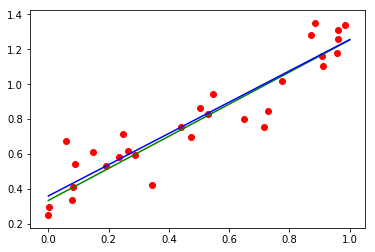

In [31]:
x_grid = np.linspace(0, 1, num = 50)
y_grid_exact = exact_func(x_grid)
y_fitted = w_opt[0] + w_opt[1] * x_grid
plt.plot(x_grid, y_grid_exact, c = "g")
plt.plot(x_grid, y_fitted, c = "b")
plt.scatter(x_train, y_train, c = "r")
plt.show()

In [32]:
print(w_opt)
print(w)

[0.35877013 0.89714466]
[0.33285145 0.92120727]


In [33]:
def f_exact(x):
    return np.square(np.sin(8*x))

In [35]:
x_min = -0.5
x_max = 0.5

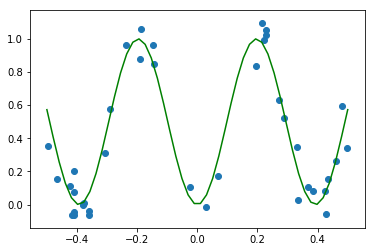

In [38]:
x_grid = np.linspace(x_min, x_max, num = 50)
y_grid_exact = f_exact(x_grid)
plt.plot(x_grid, y_grid_exact, c = "g")
plt.scatter(x_train, y_train)
plt.show()

In [37]:
Ntrain = 40
x_train = np.random.rand(Ntrain) * (x_max - x_min) + x_min
y_train_exact = f_exact(x_train)
y_train = randomly_change(y_train_exact)

In [39]:
M = 20

In [40]:
def generateDataMatrix(x, M):
    result = np.ones(x.shape[0]).reshape(-1, 1)
    column = result.copy()
    for i in range(M):
        column = column * x.reshape(-1 , 1)
        result = np.concatenate((result, column), axis = 1)
    return result

In [42]:
X_train = generateDataMatrix(x_train, M)
X_train.shape

(40, 21)

In [43]:
w_opt = FitLinearModel(X_train, y_train, 1e-8)

In [44]:
def polunomialF(x, w):
    result = np.zeros(x.shape[0])
    for i in range(w.shape[0]):
        result += w[i] * (x ** i)
    return result

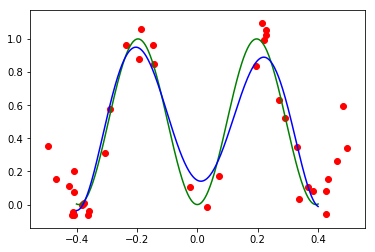

In [45]:
x_grid = np.linspace(-0.4, 0.4, num = 500)
y_grid_exact = f_exact(x_grid)
y_grid_fitted = polunomialF(x_grid, w_opt)
plt.plot(x_grid, y_grid_exact, c = "g")
plt.plot(x_grid, y_grid_fitted, c = "b")
plt.scatter(x_train, y_train, c = "r")
plt.show()

In [47]:
X_1 = np.array([[1, 0], [1, 0]])
y_1 = np.array([2, 4])
w_opt_1 = FitLinearModel(X_1, y_1, 1)
print(w_opt_1)

[3. 0.]


In [48]:
imSpect = np.load("spectral.npy")
imRGB = np.load("rgb.npy")

In [49]:
imSpect.shape

(300, 300, 61)

In [50]:
imRGB.shape

(300, 300, 3)

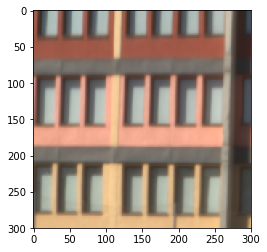

In [63]:
plt.imshow(imRGB)
plt.show()

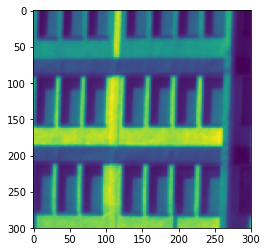

In [58]:
plt.imshow(imSpect[:, :, 40])
plt.show()

In [64]:
X_train = imSpect.reshape(-1, 61) / (2**16)
red_train = (imRGB[:, :, 0].reshape(-1) / (255)) ** (1/0.6)
green_train = (imRGB[:, :, 1].reshape(-1) / (255)) ** (1/0.6)
blue_train = (imRGB[:, :, 2].reshape(-1) / (255)) ** (1/0.6)

In [65]:
X_train.shape

(90000, 61)

In [66]:
w_red = FitLinearModel(X_train, red_train)
w_green = FitLinearModel(X_train, green_train)
w_blue = FitLinearModel(X_train, blue_train)

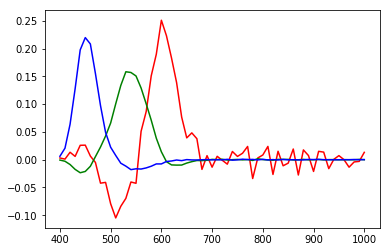

In [67]:
x_grid = np.linspace(400, 1000, num = 61)
plt.plot(x_grid, w_red, c = "r")
plt.plot(x_grid, w_green, c = "g")
plt.plot(x_grid, w_blue, c = "b")
plt.show()